# Visualize the Learning Process

### Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

### Generate Data

In [2]:
x, y = sklearn.datasets.make_moons(200, noise=0.20)

In [3]:
x.shape, y.shape

((200, 2), (200,))

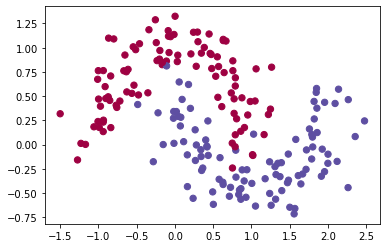

In [4]:
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)

### Convert to Tensor

In [5]:
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

### Feed Forward Model

In [6]:
class FeedForward(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [7]:
netowrk = FeedForward(2, 20, 2)
optimizer = torch.optim.SGD(netowrk.parameters(), lr=0.02)
criterion = nn.CrossEntropyLoss()

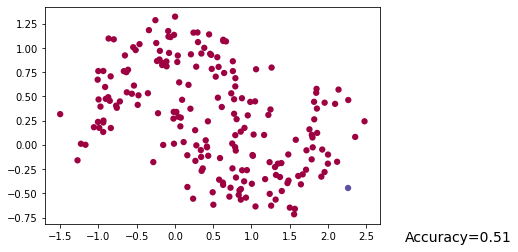

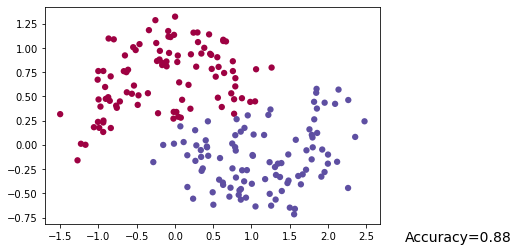

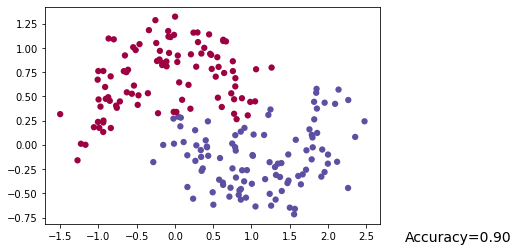

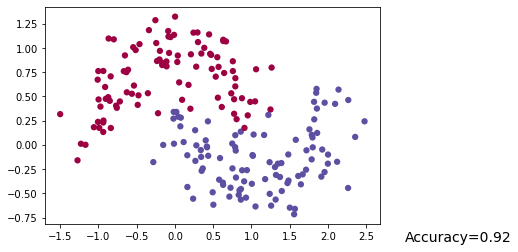

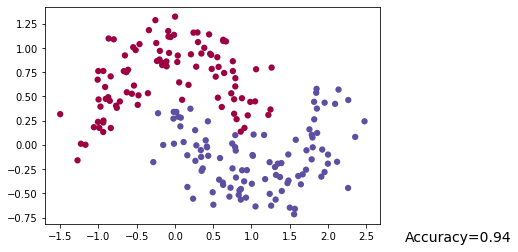

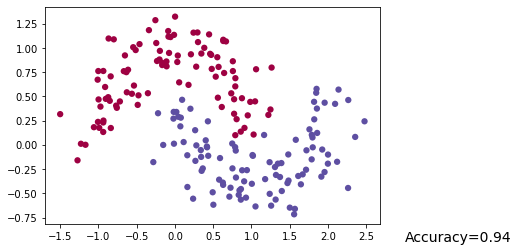

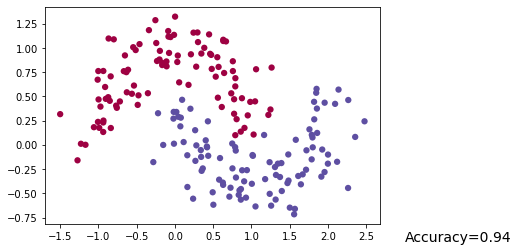

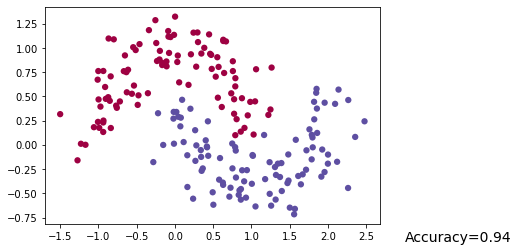

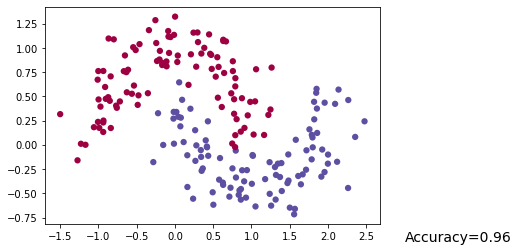

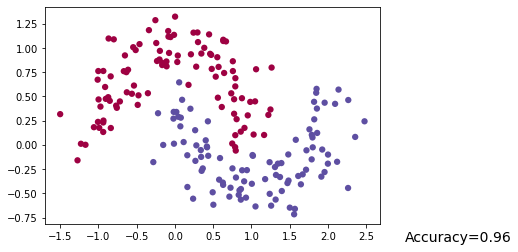

In [8]:
for epoch in range(10000):
    out = netowrk(x)
    loss = criterion(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        # show the learning process
        max_value, prediction = torch.max(out, 1)
        prediction_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.figure()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], s=40, c=prediction_y, cmap=plt.cm.Spectral, lw=0)
        accuracy = (prediction_y == target_y).sum() / target_y.size
        plt.text(3, -1, f'Accuracy={accuracy:.2f}', fontdict={'size':14})
plt.show()